# Try-this exercise

### Problem 1

Find attached to the Canvas page find a text file called "test_spectrum.dat".  This file has three columns: wavelength, flux density, and error in the flux density.  It is a synthetic spectrum representing an emission line on a background that can be expressed as a line.  

Using Sherpa, fit a model consisting of an emission line and a linear background.  For this part of the problem, use a Gaussian profile for the emission line.  The linear background can be modeled using the first two components of `Polynom1D` used above.  

The gaussian profile is described [here](https://sherpa.readthedocs.io/en/latest/model_classes/api/sherpa.astro.optical.EmissionGaussian.html), and is loaded via:

     from sherpa.astro.optical import EmissionGaussian
     gau_1=EmissionGaussian('gau_1')
     
Moreover, a model consisting of two functions that are added together is defined by:
     
     model=poly+gau_1
     
Note:
- The position of the emission line (i.e., gau_1.pos) is frozen by default, so you'll have to thaw it using `gau_1.pos.frozen=False`.
- The "skew" parameter is not used; leave it frozen at the default value.

Once you have the spectrum fit, do the following.
  1. Fit the spectrum and examine the $\chi^2$ of your model fit.  Does the model provide a good fit to the data according to $\chi^2$?  Discuss.
  2. Make a plot of the data overplotted with the model.  Are there any regions of the spectrum that are not adequately fit?  Discuss.
  3. Also useful is the "O-C" plot, in which you plot the difference between the model and the data, i.e., `plt.plot(d.x,d.y-model(d.x))`.  In the O-C plot, the region of the spectrum that are not fit well will be easily recognized.


#### $\textit{Answer}$ 

We'll start by reading in the sample spectrum. After plotting (with this outrageous style-sheet I found on twitter; feel free to change it back to normal), we can get some idea of input parameters for the model

In [3]:
#Initialize: Run twice!!
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from sherpa.data import Data1D


fontsize = 20
figsize = (10,6)

plt.style.use('dark_background')

# Configure parameters
plt.rcParams.update({'font.size': fontsize, 'figure.figsize': figsize})


# Default tick label size
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2

plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.linewidth'] = 2


Populating the interactive namespace from numpy and matplotlib


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['figsize']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Text(0.5, 1.0, 'Sample Spectrum')

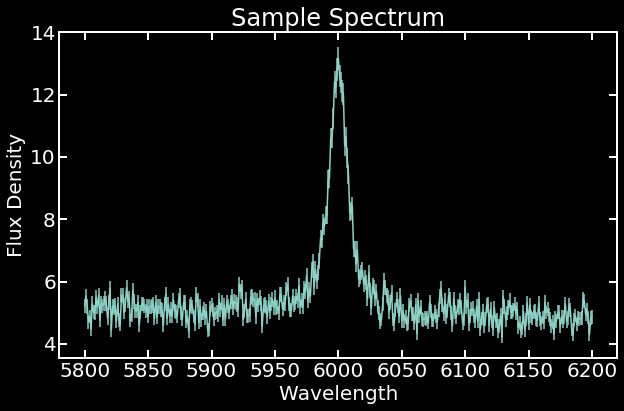

In [4]:
# Read in data, plot


lam, fluxden, error = np.loadtxt('test_spectrum.dat', unpack = True)

plt.errorbar(lam,fluxden, yerr = error)
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.title('Sample Spectrum')



In [5]:
# Set up the model in Sherpa
d=Data1D('test_spec',lam,fluxden,error)
print(d)

name      = test_spec
x         = Float64[401]
y         = Float64[401]
staterror = Float64[401]
syserror  = None


In [6]:
# Models
from sherpa.models.basic import Polynom1D
from sherpa.astro.optical import EmissionGaussian

poly=Polynom1D('poly') #Continuum
gau_1=EmissionGaussian('gau_1') # Emission feature


model = poly+gau_1
print(model)

(poly + gau_1)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   poly.c0      thawed            1 -3.40282e+38  3.40282e+38           
   poly.c1      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c2      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c3      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c4      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c5      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c6      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c7      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c8      frozen            0 -3.40282e+38  3.40282e+38           
   poly.offset  frozen            0 -3.40282e+38  3.40282e+38           
   gau_1.fwhm   thawed          100  1.17549e-38  3.40282e+38       km/s
   gau_1.pos    frozen         5000 

In [7]:
# Adjust parameters based off plot:
gau_1.pos = 6000 # feature at approx 6000
gau_1.flux = 15 # height of apparent feature
gau_1.pos.frozen = False
poly.c0 = 5 # apparent height of continuum



print(model)

(poly + gau_1)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   poly.c0      thawed            5 -3.40282e+38  3.40282e+38           
   poly.c1      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c2      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c3      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c4      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c5      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c6      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c7      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c8      frozen            0 -3.40282e+38  3.40282e+38           
   poly.offset  frozen            0 -3.40282e+38  3.40282e+38           
   gau_1.fwhm   thawed          100  1.17549e-38  3.40282e+38       km/s
   gau_1.pos    thawed         6000 

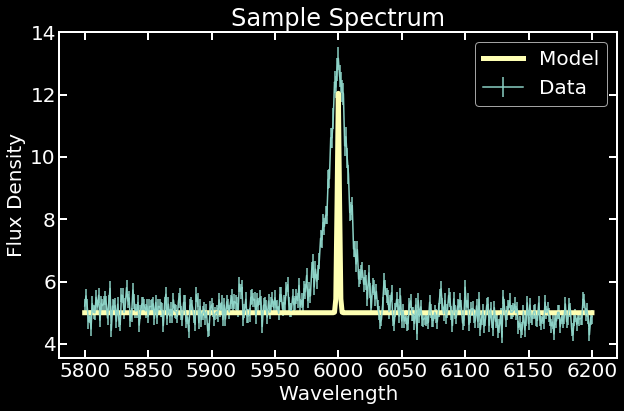

In [8]:
# Plot our model and plot:
from sherpa.fit import Fit

plt.errorbar(lam,fluxden, yerr = error, label = 'Data')
plt.plot(d.x,model(d.x), label = 'Model', linewidth = 5)
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.title('Sample Spectrum')
plt.legend()


In [9]:
# Fit the data: Re-run until change in stat is near zero; should be twice
from sherpa.stats import Chi2
stat=Chi2()

from sherpa.optmethods import LevMar
opt=LevMar()


# now fit and plot

from sherpa.fit import Fit
gfit = Fit(d, model, stat=stat, method=opt)
print (gfit) 
gres=gfit.fit()
print (gres.format())

data      = test_spec
model     = (poly + gau_1)
stat      = Chi2
method    = LevMar
estmethod = Covariance
Method                = levmar
Statistic             = chi2
Initial fit statistic = 7144.25
Final fit statistic   = 996.711 at function evaluation 56
Data points           = 401
Degrees of freedom    = 397
Probability [Q-value] = 2.5168e-53
Reduced statistic     = 2.51061
Change in statistic   = 6147.54
   poly.c0        5.0701       +/- 0.0119641   
   gau_1.fwhm     1026.25      +/- 15.0477     
   gau_1.pos      6000.01      +/- 0.131217    
   gau_1.flux     152.772      +/- 2.05404     


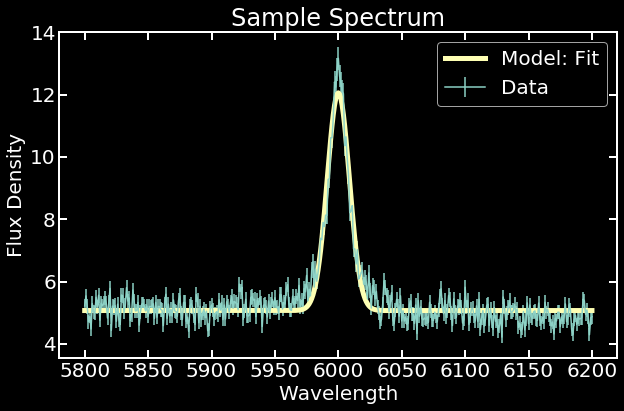

In [10]:
# Update plot
from sherpa.fit import Fit

plt.errorbar(lam,fluxden, yerr = error, label = 'Data')
plt.plot(d.x,model(d.x), label = 'Model: Fit', linewidth = 5)
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.title('Sample Spectrum')
plt.legend()


 `gfit.fit()` tells us that `Reduced Statistic = 2.5`. Since this is less than 3, we can explore use of the `Confidence` method:

In [11]:
from sherpa.estmethods import Confidence

gfit.estmethod=Confidence()
print (gfit.estmethod)
errors=gfit.est_errors()

print(errors.format())

name         = confidence
sigma        = 1
eps          = 0.01
maxiters     = 200
soft_limits  = False
remin        = 0.01
fast         = False
parallel     = True
numcores     = 16
maxfits      = 5
max_rstat    = 3
tol          = 0.2
verbose      = False
openinterval = False
gau_1.fwhm lower bound:	-18.0236
gau_1.fwhm upper bound:	18.7602
gau_1.pos lower bound:	-0.130895
gau_1.flux lower bound:	-2.1437
poly.c0 lower bound:	-0.0122947
poly.c0 upper bound:	0.0120214
gau_1.pos upper bound:	0.130474
gau_1.flux upper bound:	2.19327
Confidence Method     = confidence
Iterative Fit Method  = None
Fitting Method        = levmar
Statistic             = chi2
confidence 1-sigma (68.2689%) bounds:
   Param            Best-Fit  Lower Bound  Upper Bound
   -----            --------  -----------  -----------
   poly.c0            5.0701   -0.0122947    0.0120214
   gau_1.fwhm        1026.25     -18.0236      18.7602
   gau_1.pos         6000.01    -0.130895     0.130474
   gau_1.flux        152.772 

The results seem consistent with the model fitting procedure above. The only region where the fit looks dubious is near the peak of the emission feature. To investigate the discrepancy further, we'll make an O-C plot:

Text(0.5, 1.0, 'O-C Plot')

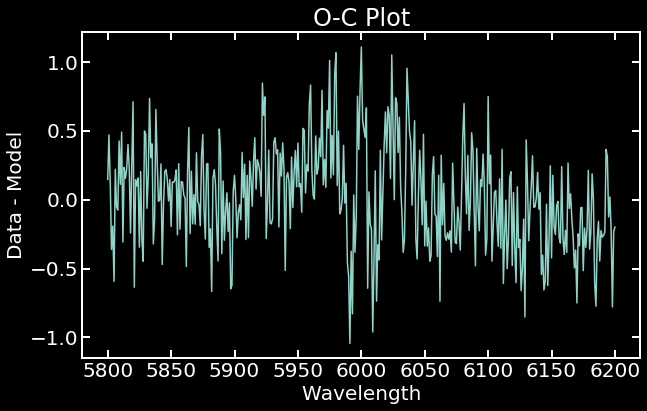

In [12]:
plt.plot(d.x,d.y-model(d.x))
plt.xlabel('Wavelength')
plt.ylabel('Data - Model')
plt.title('O-C Plot')

As expected, the difference between the data and model increases around the location of the feature (~ 5900 angstroms)

__________________________________________________________________________________________

### Problem 2

Add a second Gaussian line to your model above and fit, and do the following:

   1. Evaluate the improvement in the $\chi^2$ between this model and the model in Problem 1 using the F statistic.  Is the improvement significant?  Discuss.
   2. Make a plot of the data overplotted with this model.  Does it look like it provides a better fit?

####  $\textit{Answer:}$
We'll repeat the above procedure but add a second Gaussian to the mix:

In [13]:
# Models

poly=Polynom1D('poly') #Continuum
gau_1=EmissionGaussian('gau_1') # Emission feature 1

gau_2 = EmissionGaussian('gau_2') # Second Gaussian this time


model2 = poly+gau_1+ gau_2

# Adjust parameters based off original plot:
gau_1.pos = 6000 # feature at approx 6000
gau_1.flux = 15 # height of apparent feature

gau_2.pos = 6000
gau_2.flux = 15

gau_1.pos.frozen = False
gau_2.pos.frozen = False
poly.c0 = 5 # apparent height of continuum



print(model2)

((poly + gau_1) + gau_2)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   poly.c0      thawed            5 -3.40282e+38  3.40282e+38           
   poly.c1      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c2      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c3      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c4      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c5      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c6      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c7      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c8      frozen            0 -3.40282e+38  3.40282e+38           
   poly.offset  frozen            0 -3.40282e+38  3.40282e+38           
   gau_1.fwhm   thawed          100  1.17549e-38  3.40282e+38       km/s
   gau_1.pos    thawed    

In [14]:
# Fit the data: Re-run until change in stat is near zero; should be twice
stat=Chi2()
opt=LevMar()


# now fit and plot

from sherpa.fit import Fit
gfit = Fit(d, model2, stat=stat, method=opt)
gfit = Fit(d, model2, stat=stat, method=opt)
print (gfit) 
gres=gfit.fit()
print (gres.format())

data      = test_spec
model     = ((poly + gau_1) + gau_2)
stat      = Chi2
method    = LevMar
estmethod = Covariance
Method                = levmar
Statistic             = chi2
Initial fit statistic = 7033.88
Final fit statistic   = 798.868 at function evaluation 160
Data points           = 401
Degrees of freedom    = 394
Probability [Q-value] = 9.91774e-30
Reduced statistic     = 2.02758
Change in statistic   = 6235.01
   poly.c0        5.01447      +/- 0.0132636   
   gau_1.fwhm     2403.59      +/- 158.774     
   gau_1.pos      5998.49      +/- 0.867292    
   gau_1.flux     78.3439      +/- 5.16981     
   gau_2.fwhm     753.842      +/- 25.1468     
   gau_2.pos      6000.18      +/- 0.150938    
   gau_2.flux     98.7149      +/- 5.15915     


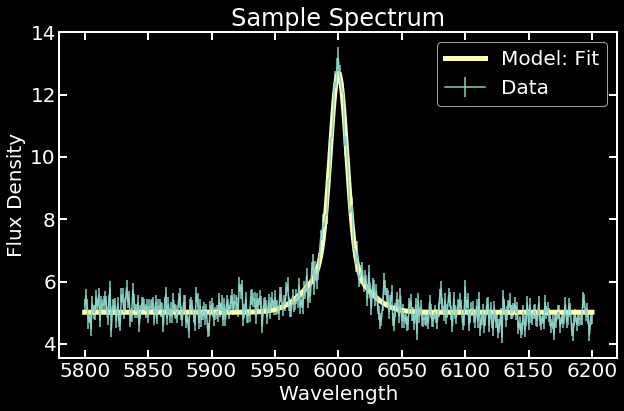

In [15]:
# Update plot

plt.errorbar(lam,fluxden, yerr = error, label = 'Data')
plt.plot(d.x,model2(d.x), label = 'Model: Fit', linewidth = 5)
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.title('Sample Spectrum')
plt.legend()


The reduced statistic for this fit is now down to 2.02, suggesting that we now have a better fit. Visual inspection also shows improved behavior near the peak of the emission feature, but we'll check a couple of more things to be sure:

Text(0.5, 1.0, 'O-C Plot')

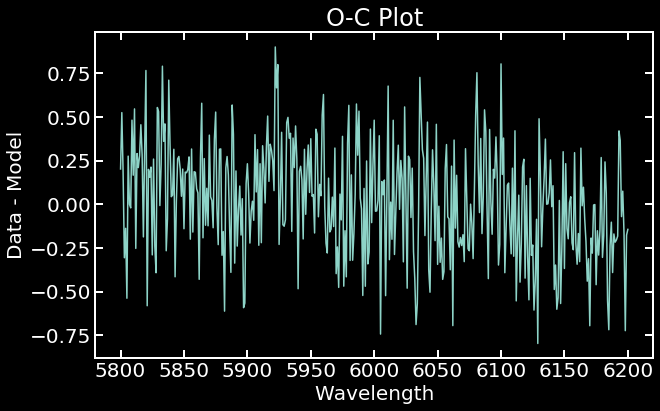

In [16]:
# O-C Plot:
plt.plot(d.x,d.y-model2(d.x))
plt.xlabel('Wavelength')
plt.ylabel('Data - Model')
plt.title('O-C Plot')



The O-C plot shows imporved behavior near the maximum as well. Next we'll preform an F test to see if the two samples share the same population mean. Assuming the varience of both sample follows a normal distribution, we can compute the f-statistic directly by taking the ratio of the varience:

In [17]:
np.var(model(d.x)) / np.var(model2(d.x))

0.9635280656718346

So they are reasonably consistent

__________________________________________________________________________________________________________________

### Problem 3

Instead of a Gaussian line, try a Lorentzian profile.  That model is described [here](https://sherpa.readthedocs.io/en/latest/model_classes/api/sherpa.astro.optical.EmissionLorentz.html).

Note:
- The position of the emission line is again frozen by default, so you'll have to thaw it .
- The "kurt" parameter is not used; leave it frozen at the default value.

Next:

   1. Fit the spectrum with the model consisting of the linear model plus the Lorentzian emission line.  Make a plot of the data overplotted by the model. 
   2. Compare the results with the results of Problem 2.  How do the $\chi^2$ compare?  Evaluate using the F statistic.

#### $\textit{Answer}:$

We'll proceed as above but this time replace our `EmissionGaussian` model with a `EmissionLorentz` model:

In [19]:
# Models
from sherpa.astro.optical import EmissionLorentz


poly=Polynom1D('poly') #Continuum

lorr=EmissionLorentz('Lorr_1') # Emission feature, this time with a Lorentz


model3 = poly+lorr

# Adjust parameters based off original plot:

lorr.pos = 6000 # feature at approx 6000
lorr.flux = 15 # height of apparent feature


lorr.pos.frozen = False
poly.c0 = 5 # apparent height of continuum



print(model3)

(poly + Lorr_1)
   Param        Type          Value          Min          Max      Units
   -----        ----          -----          ---          ---      -----
   poly.c0      thawed            5 -3.40282e+38  3.40282e+38           
   poly.c1      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c2      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c3      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c4      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c5      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c6      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c7      frozen            0 -3.40282e+38  3.40282e+38           
   poly.c8      frozen            0 -3.40282e+38  3.40282e+38           
   poly.offset  frozen            0 -3.40282e+38  3.40282e+38           
   Lorr_1.fwhm  thawed          100  1.17549e-38  3.40282e+38       km/s
   Lorr_1.pos   thawed         6000

In [20]:
# Fit the data: Re-run until change in stat is near zero; should be twice
stat=Chi2()
opt=LevMar()


# now fit and plot

from sherpa.fit import Fit
gfit = Fit(d, model3, stat=stat, method=opt)
print (gfit) 
gres=gfit.fit()
print (gres.format())

data      = test_spec
model     = (poly + Lorr_1)
stat      = Chi2
method    = LevMar
estmethod = Covariance
Method                = levmar
Statistic             = chi2
Initial fit statistic = 6970.21
Final fit statistic   = 791.606 at function evaluation 36
Data points           = 401
Degrees of freedom    = 397
Probability [Q-value] = 1.80603e-28
Reduced statistic     = 1.99397
Change in statistic   = 6178.6
   poly.c0        4.96263      +/- 0.0129147   
   Lorr_1.fwhm    797.453      +/- 17.5744     
   Lorr_1.pos     6000.06      +/- 0.125691    
   Lorr_1.flux    203.051      +/- 3.13264     


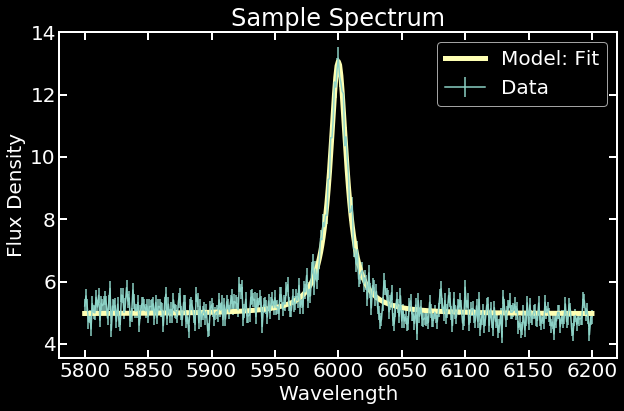

In [21]:
# Update plot

plt.errorbar(lam,fluxden, yerr = error, label = 'Data')
plt.plot(d.x,model3(d.x), label = 'Model: Fit', linewidth = 5)
plt.xlabel('Wavelength')
plt.ylabel('Flux Density')
plt.title('Sample Spectrum')
plt.legend()


Visually the fit looks about as good as the two-gaussian model in problem 2. The two models also have a very similar $\chi^2$: This model has a reduced statstic of about 1.99 while the previous had a reduced statistic of 2.02. We'll now preform the F-test for the two samples:

In [22]:
np.var(model3(d.x)) / np.var(model2(d.x))

1.0021754780702459

The f-test tells us that we can support the null hypothesis that the varience of these two models is about equal. In other words, fitting two Gaussians approximates the data as well as a Lorentizan. 